In [1]:
# Install the latest bio-compose from PyPI:

# !pip install -q bio-compose

In [1]:
# Import the simulation verifier:

import sys 
import os 
sys.path.insert(0, '..')

from bio_compose.verifier import Verifier

In [2]:
# Define sbml verification submission (query) parameters (Uniform Time Course) for BioModel 0001:

# model parameters
sbml_fp = '../tests/fixtures/sbml-core/BIOMD0000000001_url.xml'
simulators = ['amici', 'copasi', 'tellurium']

# "time" parameters
start_time = 0  # 'start'
end_time = 100  # 'end'
n_steps = 1000  # 'steps'

# comparison parameters 
rtol = None  # if this parameter is omitted from the submission, its default value is 1e-4
atol = 1e-08  # here we are using the defaults used by np.allclose as an example of custom tolerances. Otherwise, max(1e-3, max1 * 1e-5, max2 * 1e-5) where max1 is the max() of the given piecewise arrays.

In [3]:
# instantiate a new Verifier:

verifier = Verifier()

In [ ]:
# use the Verifier instance to submit a new simulation verification to the server using aforementioned query parameters:

submission = verifier.verify_sbml(
    entrypoint=sbml_fp,
    start=start_time,
    end=end_time,
    steps=n_steps,
    simulators=simulators,
    rTol=rtol,
    aTol=atol,
    # selection_list=['<ANY SIMULATION OBSERVABLE NAME>']  <-- optionally you can include specific observables in the verification, otherwise include all matching observables.
)

In [4]:
# the verification's status/data can be fetched using the 'job_id' field from the output of the previous cell (submission):

# job_id = submission['job_id']
job_id = 'verification-utc_comparison_omex-fa825fe6-80b1-46c3-8352-86d8cb09b098'


verifier.get_job_status(job_id)
# submission

'COMPLETED'

In [5]:
# use the get_output method of Verifier to poll the API for results:

verification_result = verifier.get_output(job_id)

verification_result['content']['results'].keys()

dict_keys(['comparison_id', 'CT', 'Reaction2', 'Reaction5', 'Reaction7', 'YP', 'Reaction4', 'Reaction3', 'Y', 'CP', 'EmptySet', 'Reaction8', 'Reaction6', 'Reaction9', 'M', 'YT', 'pM', 'time', 'C2', 'pcyclin_cdc2', 'Reaction1', 'cell', 'total_cyclin', 'Time', 'rmse'])

In [6]:
# use the get rmse method to get the root-mean-square error score for a given verification submission

verifier.get_rmse(job_id)

{'copasi': {'copasi': 0.0, 'tellurium': 0.027142250546163618},
 'tellurium': {'copasi': 0.027142250546163618, 'tellurium': 0.0}}

In [7]:
# showing a sample output observable proximity comparison:

sample_verification_result = verification_result['content']['results']['Y']
sample_proximity_matrix = sample_verification_result['proximity']

sample_proximity_matrix

{'copasi': {'copasi': True, 'tellurium': True},
 'tellurium': {'copasi': True, 'tellurium': True}}

In [9]:
# use the verifier's export_csv method to export the ouput data on which the verification is calculated (from each simulator):

csv_dir = os.path.dirname('.')
model_name = verification_result['content']['source'].replace('xml', 'csv')
csv_name = os.path.join(csv_dir, model_name)

verifier.export_csv(data=verification_result, save_dest=csv_name)

In [10]:
# csv is saved to the specified destination:

!ls . 

BIOMD0000000001_url.csv       verification_colab_demo.ipynb
BIOMD0000000005.omex          verification_demo.ipynb


In [11]:
# Verifier also allows for reading in previously generated observables:

observables_df = verifier.read_observables(csv_name)

observables_df

,CT_copasi,CT_tellurium,Reaction2_copasi,Reaction2_tellurium,Reaction5_copasi,Reaction5_tellurium,Reaction7_copasi,Reaction7_tellurium,YP_copasi,YP_tellurium,...,pcyclin_cdc2_copasi,pcyclin_cdc2_tellurium,Reaction1_copasi,Reaction1_tellurium,cell_copasi,cell_tellurium,total_cyclin_copasi,total_cyclin_tellurium,Time_copasi,Time_tellurium
0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.25,0.250000,0.0,0.0
1,1.0,1.0,747.874639,747.874639,0.0,0.0,0.0,0.0,0.000021,0.000021,...,0.000429,0.000429,0.000429,0.000429,1.0,1.0,0.25,0.251500,0.1,0.1
2,1.0,1.0,746.439461,746.439461,0.0,0.0,0.0,0.0,0.000081,0.000081,...,0.000821,0.000821,0.000821,0.000821,1.0,1.0,0.25,0.252997,0.2,0.2
3,1.0,1.0,745.041700,745.041700,0.0,0.0,0.0,0.0,0.000174,0.000174,...,0.001180,0.001180,0.001180,0.001180,1.0,1.0,0.25,0.254489,0.3,0.3
4,1.0,1.0,743.678285,743.678285,0.0,0.0,0.0,0.0,0.000295,0.000295,...,0.001510,0.001510,0.001510,0.001510,1.0,1.0,0.25,0.255975,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.0,1.0,817.206900,817.205309,0.0,0.0,0.0,0.0,0.004835,0.004835,...,0.003283,0.003284,0.003283,0.003284,1.0,1.0,0.25,0.186908,99.6,99.6
997,1.0,1.0,816.037978,816.036391,0.0,0.0,0.0,0.0,0.004874,0.004874,...,0.003312,0.003312,0.003312,0.003312,1.0,1.0,0.25,0.188117,99.7,99.7
998,1.0,1.0,814.871859,814.870276,0.0,0.0,0.0,0.0,0.004913,0.004913,...,0.003340,0.003340,0.003340,0.003340,1.0,1.0,0.25,0.189323,99.8,99.8
999,1.0,1.0,813.708550,813.706971,0.0,0.0,0.0,0.0,0.004952,0.004952,...,0.003368,0.003368,0.003368,0.003368,1.0,1.0,0.25,0.190527,99.9,99.9


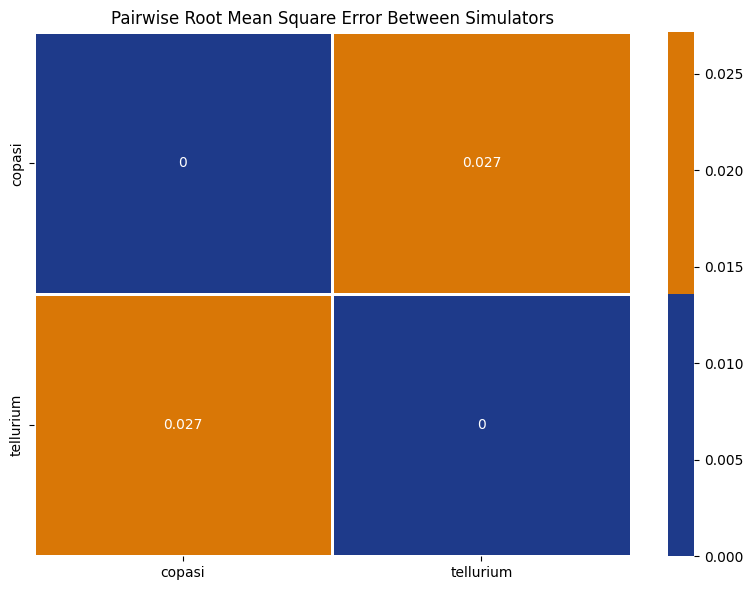

In [13]:
# visualize multiple aspects of the verification result including: observables data, mean square error for each observable (for each simulator)... 
    # ...or in this case, RMSE results for each simulator accross all observables

verifier.visualize_rmse(verification_result['content']['job_id'])

In [5]:
rmse = verifier.get_rmse('verification-utc_comparison_omex-226e6040-e295-442e-a307-233d932c51bd')

In [6]:
rmse

{'amici': {'amici': 0.0,
  'copasi': 0.027155406522879965,
  'tellurium': 0.002671429272379995},
 'copasi': {'amici': 0.027155406522879965,
  'copasi': 0.0,
  'tellurium': 0.027145472648917392},
 'tellurium': {'amici': 0.002671429272379995,
  'copasi': 0.027145472648917392,
  'tellurium': 0.0}}

In [39]:
def visualize_rmse(job_id: str, size_dimensions: tuple[int, int] = None, color_mapping: list[str] = None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # extract data 
    rmse_data = verifier.get_rmse(job_id)
    simulators = list(rmse_data.keys())
    n_simulators = len(simulators)
    if color_mapping is None:
        color_mapping = ['#1E3A8A', '#D97706']
    
    # set up figure
    size_dimensions = size_dimensions or (8, 6)
    plt.figure(figsize=size_dimensions)
    sns.heatmap(
        data=[list(v.values()) for s, v in rmse.items()],
        annot=True,
        xticklabels=simulators,
        yticklabels=simulators,
        cmap=color_mapping,
        linewidths=1
    )
    
    # set up plot annotations
    plt.title('Pairwise Root Mean Square Error Between Simulators')
    plt.tight_layout()
    plt.show()

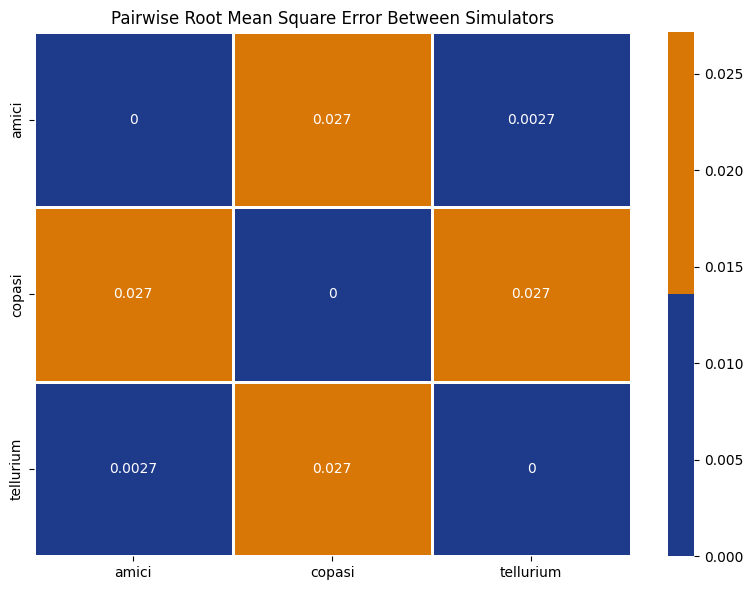

In [40]:
visualize_rmse(job_id='verification-utc_comparison_omex-226e6040-e295-442e-a307-233d932c51bd')

In [28]:
import matplotlib.pyplot as plt

dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_pyplot_note',
 '_api',
 '_auto_draw_if_interactive',
 '_